# 5 Individual Segmentations (DAPI + membrane) and Data Extraction 

- In this notebook, each membrane marker is run independently with the DAPI nuclear marker
- Loading the .tif file in Qupath, each seperate image was filtered using grayscale option
- Each image was then exported as a Rendered RBG jpg 
- Make sure to run each cell once



## Image Preprocessing

In [25]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image 
from skimage import measure

dapi = mpimg.imread("DAPI_1.jpg")
pdl1 = mpimg.imread("PD_L1_1.jpg")
cd8 = mpimg.imread("CD8_1.jpg")
ck = mpimg.imread("CK_1.jpg")
cd68 = mpimg.imread("CD68_1.jpg")
cd3 = mpimg.imread("CD3_1.jpg")


original_length = dapi.shape[0]
original_width = dapi.shape[1]

#convert to Image
dapi = Image.fromarray(dapi)
pdl1 = Image.fromarray(pdl1)
cd8 = Image.fromarray(cd8)
ck = Image.fromarray(ck)
cd68 = Image.fromarray(cd68)
cd3 = Image.fromarray(cd3)

#resize to square shape
sqrWidth = np.ceil(np.sqrt(dapi.size[0]*dapi.size[1])).astype(int)
dapi = dapi.resize((sqrWidth, sqrWidth))
pdl1 = pdl1.resize((sqrWidth, sqrWidth))
cd8 = cd8.resize((sqrWidth, sqrWidth))
ck = ck.resize((sqrWidth, sqrWidth))
cd68 = cd68.resize((sqrWidth, sqrWidth))
cd3 = cd3.resize((sqrWidth, sqrWidth))

#Convert back to array
dapi = np.array(dapi)
pdl1 = np.array(pdl1)
cd8 = np.array(cd8)
ck = np.array(ck)
cd68 = np.array(cd68)
cd3 = np.array(cd3)

#resize to 2D to stack images
dapi = dapi[:,...,0]
pdl1 = pdl1[:,...,0]
cd8 = cd8[:,...,0]
ck = ck[:,...,0]
cd68 = cd68[:,...,0]
cd3 = cd3[:,...,0]

### Add missing axes
- add channel axis (4th) and FOV axis (1st)

- DAPI will act as the nuclear marker, paired with each membrane marker





- marker1 = PD-L1 (with dapi in first channel)
- marker2 = CD8 ...
- marker3 = CK ...
- marker4 = CD68 ...
- marker5 = CD3 ...



In [3]:
dapi = dapi[np.newaxis, ..., np.newaxis]
pdl1 = pdl1[np.newaxis, ...]
cd8 = cd8[np.newaxis, ...]
cd3 = cd3[np.newaxis, ...]
cd68 = cd68[np.newaxis,...]
ck = ck[np.newaxis,...]


marker1 = np.repeat(dapi, 2, axis = 3)
marker2 = np.repeat(dapi, 2, axis = 3)
marker3 = np.repeat(dapi, 2, axis = 3)
marker4 = np.repeat(dapi, 2, axis = 3)
marker5 = np.repeat(dapi, 2, axis = 3)


marker1[:,...,1] = pdl1
marker2[:,...,1] = cd8
marker3[:,...,1] = ck
marker4[:,...,1] = cd68
marker5[:,...,1] = cd3


## Data Input:
- [FOV, row, column, channel]
- Field of view: region of slide
- Row pixel number of image
- Column pixel number of image
- Channel: nuclear or membrane

#### Initialization of multiplex model using pretrained weights

In [4]:
from deepcell.applications import MultiplexSegmentation
app = MultiplexSegmentation(use_pretrained_weights=True) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
print('Training Resolution:', app.model_mpp, 'microns per pixel')

Training Resolution: 0.5 microns per pixel


## Segmentation Prediction

### DAPI

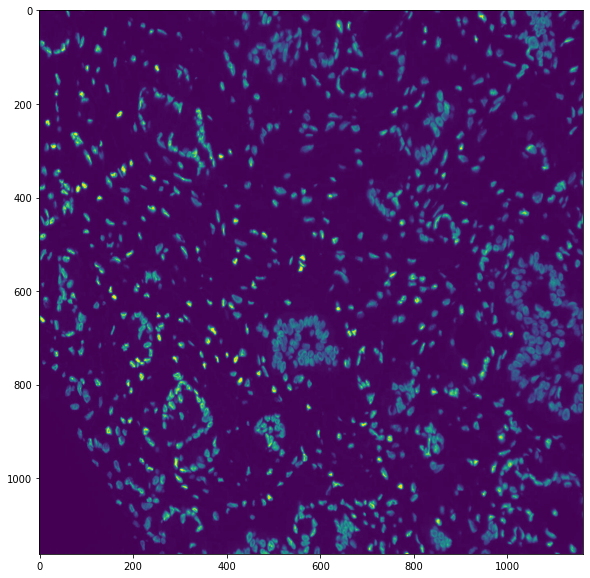

In [6]:
plt.figure(figsize = (10,10))
plt.imshow(marker1[0,...,0])

### Marker 1: PD-L1

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

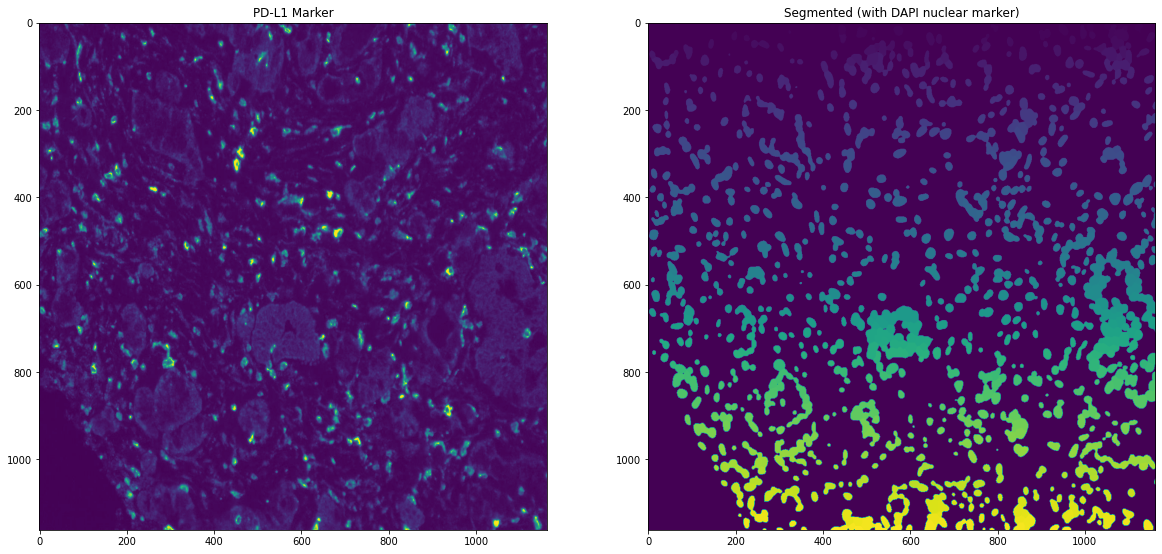

In [7]:
labeled_marker1 = app.predict(marker1, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].imshow(marker1[0,...,1])
ax[0].set_title("PD-L1 Marker")
ax[1].imshow(labeled_marker1[0,...,0])
ax[1].set_title("Segmented (with DAPI nuclear marker)")

### Marker 2: CD8

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

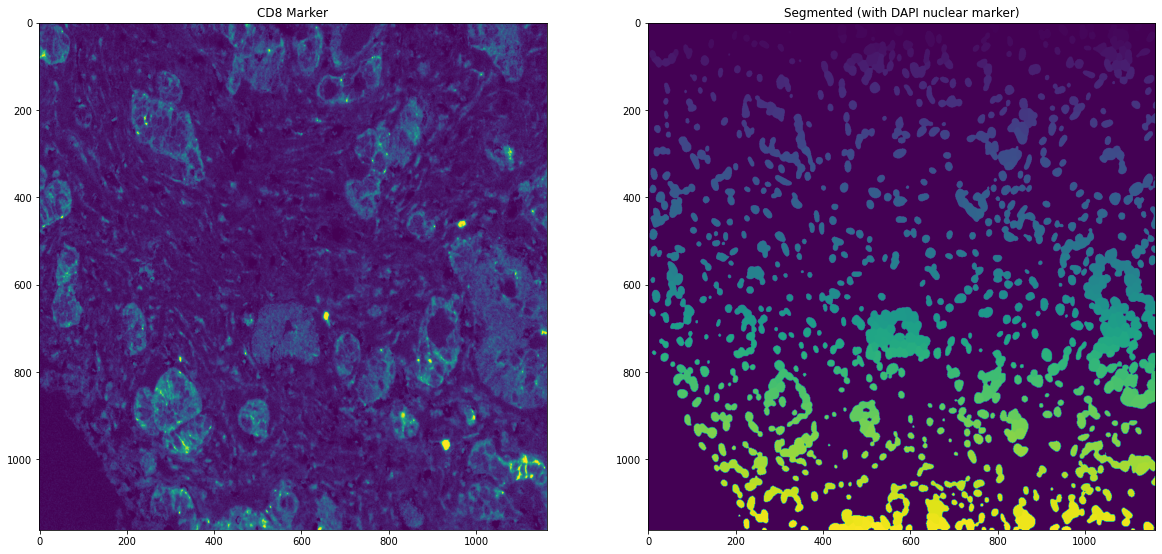

In [8]:
labeled_marker2 = app.predict(marker2, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].set_title("CD8 Marker")
ax[0].imshow(marker2[0,...,1])
ax[1].imshow(labeled_marker2[0,...,0])
ax[1].set_title("Segmented (with DAPI nuclear marker)")

### Marker 3: CK

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

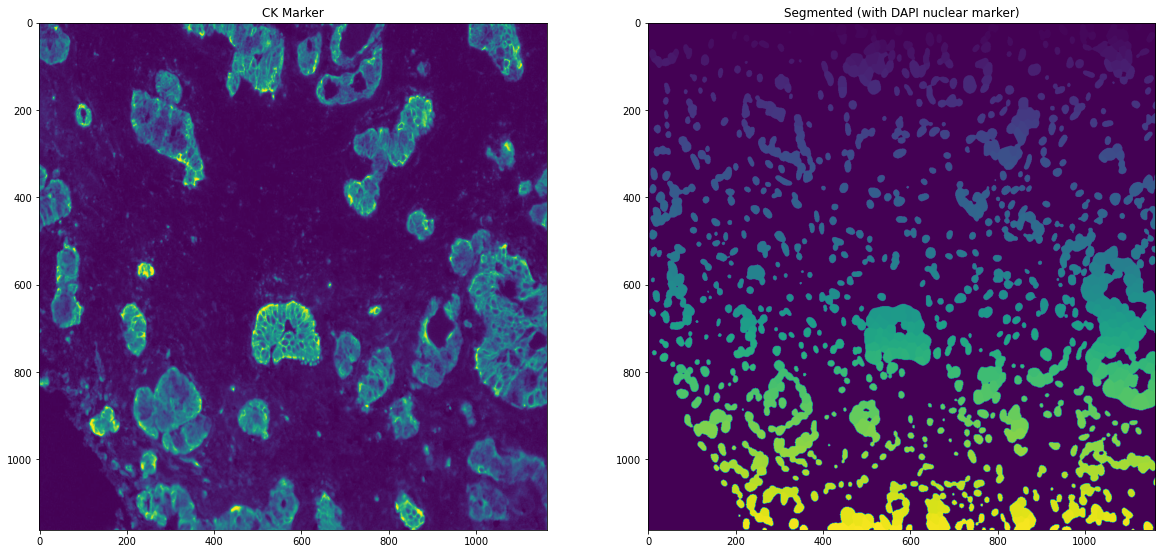

In [9]:
labeled_marker3 = app.predict(marker3, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].imshow(marker3[0,...,1])
ax[0].set_title("CK Marker")
ax[1].imshow(labeled_marker3[0,...,0])
ax[1].set_title("Segmented (with DAPI nuclear marker)")

### Marker 4: CD68

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

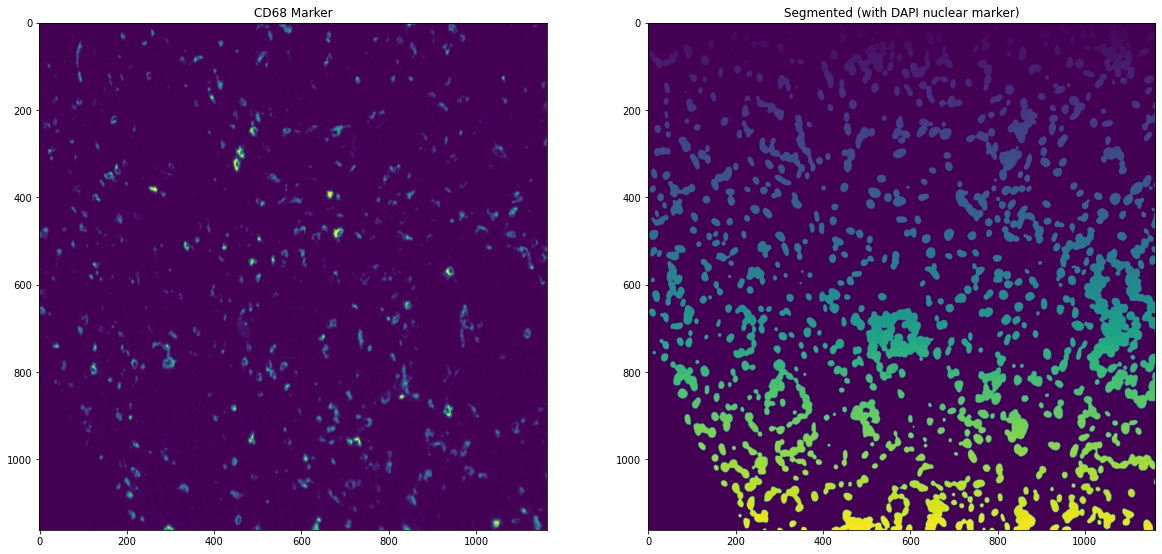

In [10]:
labeled_marker4 = app.predict(marker4, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].imshow(marker4[0,...,1])
ax[0].set_title("CD68 Marker")
ax[1].imshow(labeled_marker4[0,...,0])
ax[1].set_title("Segmented (with DAPI nuclear marker)")

### Marker 5: CD3

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

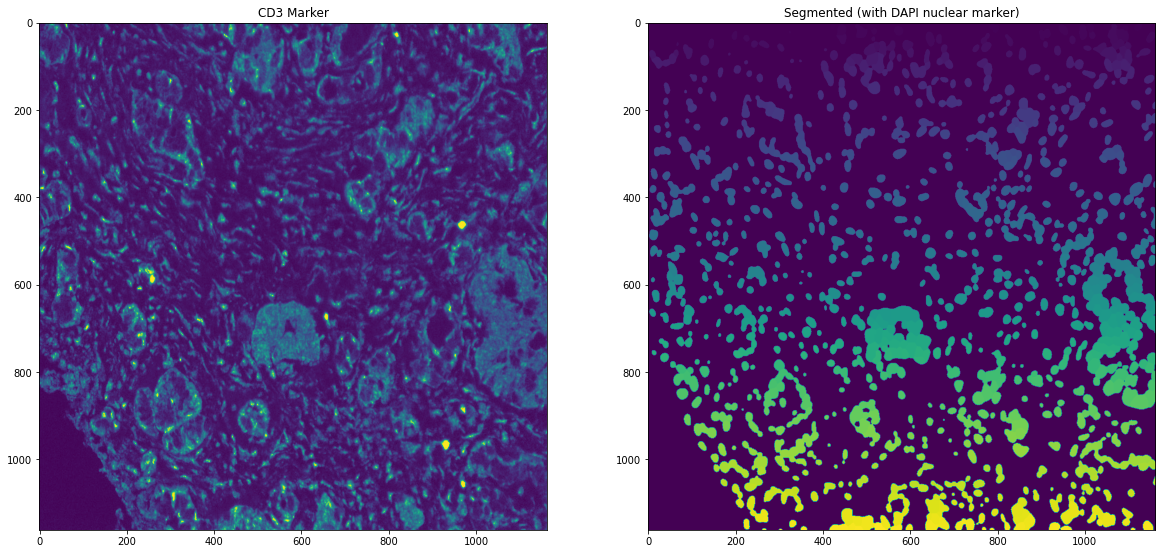

In [11]:
labeled_marker5 = app.predict(marker5, image_mpp=0.5)
fig, ax = plt.subplots(1,2, figsize=(20, 20))
ax[0].imshow(marker5[0,...,1])
ax[0].set_title("CD3 Marker")
ax[1].imshow(labeled_marker5[0,...,0])
ax[1].set_title("Segmented (with DAPI nuclear marker)")

## Intensity/Centroid/Area Extraction 
- Each labeled cell object in the above multiplex segmentations have different intensities-from this a mask is generated onto the original membrane marker image and the intensity data at each exact corresponding pixel is computed
- Instead of using the data generator with the deepcell application, the averages of the labeled pixels identified with the multiplex segmentation neural net are used here
- Columns: 
    - Marker Name
    - Cell Index
    - Total Area Mean Intensity
    - Total Area Max Intensity
    - Total Area Min Intensity
    - Contour Mean Intensity
    - Contour Max Intensity
    - Contour Min Intensity
    - Border Object (Yes/No)
    - Cell Object Size (Total Pixels)
    - Centroid X Coord 
    - Centroid Y Coord


### Resize segmentation images back to original size

In [20]:
import cv2

r_labeled_marker1 = cv2.resize(labeled_marker1[0,...,0], (original_width, original_length), interpolation = cv2.INTER_NEAREST)
r_labeled_marker2 = cv2.resize(labeled_marker2[0,...,0], (original_width, original_length), interpolation = cv2.INTER_NEAREST)
r_labeled_marker3 = cv2.resize(labeled_marker3[0,...,0], (original_width, original_length), interpolation = cv2.INTER_NEAREST)
r_labeled_marker4 = cv2.resize(labeled_marker4[0,...,0], (original_width, original_length), interpolation = cv2.INTER_NEAREST)
r_labeled_marker5 = cv2.resize(labeled_marker5[0,...,0], (original_width, original_length), interpolation = cv2.INTER_NEAREST)


r_marker1 = cv2.resize(marker1[0,...,1], (original_width, original_length), interpolation = cv2.INTER_NEAREST)                         
r_marker2 = cv2.resize(marker2[0,...,1], (original_width, original_length), interpolation = cv2.INTER_NEAREST)
r_marker3 = cv2.resize(marker3[0,...,1], (original_width, original_length), interpolation = cv2.INTER_NEAREST) 
r_marker4 = cv2.resize(marker4[0,...,1], (original_width, original_length), interpolation = cv2.INTER_NEAREST) 
r_marker5 = cv2.resize(marker5[0,...,1], (original_width, original_length), interpolation = cv2.INTER_NEAREST) 
 
    
r_nucl = cv2.resize(marker1[0,...,0], (original_width, original_length), interpolation = cv2.INTER_NEAREST) #dapi

In [21]:
labeled_markers = [r_labeled_marker1, r_labeled_marker2, r_labeled_marker3, r_labeled_marker4, r_labeled_marker5]
orig_mark_im = [r_marker1, r_marker2, r_marker3, r_marker4, r_marker5]
#in order
marker_names = ["PD-L1", "CD8", "CK", "CD68", "CD3"]
num_markers = 5

In [22]:
#functions for intensity extraction
def border_object(x_coord, y_coord, FOV_max_x, FOV_max_y):
    """Return true if object contains a border pixel
    
    Keyword arguments:
    x_coord -- flattened list of x coordinates of contour
    y_coord -- flattened list of y coordinates of contour
    FOV_max_x -- maximum value of x coordinate of FOV in which object is located in
    FOV_max_y -- maximum value of y coordinate of FOV in which object is located in
    
    """
    if FOV_max_x in x_coord:
        return True
    if FOV_max_y in y_coord:
        return True
    if 0 in x_coord or 0 in y_coord:
        return True
    return False   


def intensity_list_gen(FOV_labeled):  
    """Return list of all label intensities except for 0 intensity
    
    Keyword arguments:
    FOV_labeled -- FOV with labels of cell objects

    """
    rang = list(FOV_labeled.flat)
    res = []
    for i in rang:
        if i not in res:
            res.append(i)
    res.pop(0) #does not include 0 intensity
    return res

In [26]:
def output_marker_data(num_markers, labeled_markers, orig_mark_im):
    """Returns array with columns:
        Marker Name
        Cell Index
        Total Area Mean Intensity
        Total Area Max Intensity
        Total Area Min Intensity
        Contour Mean Intensity
        Contour Max Intensity
        Contour Min Intensity
        Border Object (Yes/No)
        Cell Object Size (Total Pixels)
        Centroid X Coord
        Centroid Y Coord
    
    Keyword Arguments:
    num_markers -- number of membrane markers 
    labeled_markers -- array of 2D segmented images (1 per marker)
                ex. [r_labeled_marker1, r_labeled_marker2, r_labeled_marker3...]
    orig_mark_im -- array of 2D original images (1 per marker)
                ex. [r_marker1, r_marker2, r_marker3...]
                    where r_marker1.shape = r_labeled_marker1.shape
    Note: will take few minutes to generate output if large amount of data
    
    """
    
    
    print("Computing...")
    row_num = 0
    for z in range(num_markers):
        l_region = labeled_markers[z]
        orig_region = orig_mark_im[z]
    
        res = intensity_list_gen(l_region)
        number_cells = len(res)
        
        if z == 0:
            array_df = np.zeros((number_cells, 12))
        else:
            array_df = np.append(array_df, np.zeros((number_cells, 12)), axis = 0)

        
        for i in range(row_num, number_cells+row_num):
            array_df[i][0] = z + 1 #Marker Name
            array_df[i][1] = (i + 1)-row_num #Cell Index
            temp_highlight = l_region == res[i - row_num]
    
            ii = np.where(temp_highlight == True)
            
            length_coord = len(ii[0])
            width_coord = len(ii[1])
            intensities = np.zeros(width_coord)
            
            x = np.zeros(length_coord)
            y = np.zeros(width_coord)
            
            contours = measure.find_contours(temp_highlight, 0) #compute contour
            contours = contours[:][:][0]
            
            c_intensities = np.zeros(len(contours[:,0])) #contour pixel intensity values
            c_x = np.zeros(len(contours[:,0])) #x coordinates
            c_y = np.zeros(len(contours[:,0])) #y coordinates
            
            for k in range(len(contours[:,0])):
                c_x = int(contours[:,1][k])
                c_y = int(contours[:,0][k])
                c_intensities[k] = orig_region[c_y][c_x]
            
            for j in range(length_coord): #extract from original image/compute average intensities/centroid based off this
                y_temp = ii[0][j]
                y[j] = y_temp
                x_temp = ii[1][j]
                x[j] = x_temp
                intensities[j] = orig_region[y_temp][x_temp]
            
            array_df[i][2] = np.mean(intensities) #total area mean intensity
            array_df[i][3] = np.max(intensities) #total area max intensity
            array_df[i][4] = np.min(intensities) #total area min intensity
            array_df[i][5] = np.mean(c_intensities) #contour mean intensity
            array_df[i][6] = np.max(c_intensities) #contour max intensity
            array_df[i][7] = np.min(c_intensities) #contour min intensity
            array_df[i][8] = border_object(list(contours[:,1]), list(contours[:,0]), orig_region.shape[1]-1, orig_region.shape[0]-1)
                #border object (yes/no)
            array_df[i][9] = len(intensities) #total pixel area (total pixels)
            array_df[i][10] = np.mean(x) #Centroid X Location
            array_df[i][11] = np.mean(y) #Centroid Y Location
      
        row_num = i
        row_num += 1
        
        print("Marker Finished:", z+1)
        print("Last Object Number", row_num)
    return array_df

In [27]:
a = output_marker_data(num_markers, labeled_markers, orig_mark_im)

Computing...
Marker Finished: 1
Last Object Number 1057
Marker Finished: 2
Last Object Number 2087
Marker Finished: 3
Last Object Number 3177
Marker Finished: 4
Last Object Number 4250
Marker Finished: 5
Last Object Number 5297


In [43]:
import pandas as pd
df = pd.DataFrame(a)

In [44]:
df.shape

(5297, 12)

In [45]:
df.columns = ['Marker Name', 'Cell Index', 'Total Area Mean Intensity', 'Total Area Max Intensity', 
              'Total Area Min Intensity', 'Contour Average Intensity', 'Contour Max Intensity', 
              'Contour Min Intensity', 'Border Object', 'Pixel Area', 'X Centroid Coord', 
              'Y Centroid Coord']

In [46]:
df.head()

Marker Name  Cell Index  Total Area Mean Intensity  \
0          1.0         1.0                  89.892086   
1          1.0         2.0                  23.240741   
2          1.0         3.0                  20.512500   
3          1.0         4.0                  36.706349   
4          1.0         5.0                  44.391447   

   Total Area Max Intensity  Total Area Min Intensity  \
0                     255.0                      10.0   
1                      63.0                       7.0   
2                      34.0                       4.0   
3                      77.0                       8.0   
4                     128.0                      16.0   

   Contour Average Intensity  Contour Max Intensity  Contour Min Intensity  \
0                  93.227273                  240.0                    8.0   
1                  28.966667                  105.0                    6.0   
2                  18.522727                   38.0                    3.0   
3                  22.048780                   78.0                    5.0   
4                  44.462687                   98.0                   14.0   

   Border Object  Pixel Area  X Centroid Coord  Y Centroid Coord  
0            0.0       139.0        986.776978          6.805755  
1            0.0        54.0        112.740741          5.592593  
2            0.0       160.0        433.587500          9.193750  
3            0.0       126.0         76.000000          9.468254  
4            0.0       304.0        592.226974         13.115132

In [47]:
def tran_num_to_marker(df):
    """
    Applies transformation of 'Marker Name' column by converting ints to the marker name strings
    
    Keyword arguments:
    df--dataframe
    """
    num_markers = 5
    markers_names = ["PD-L1", "CD8", "CK", "CD68", "CD3"] #edit this if changing markers
    for i in range(num_markers):
        if df['Marker Name'] == i+1:
            return markers_names[i]
    
df['Marker Name'] = df.apply(tran_num_to_marker,axis=1)
df['Border Object'] = df['Border Object'].map({1 : 'yes', 0 : 'no'}) 

In [48]:
df.head()

Marker Name  Cell Index  Total Area Mean Intensity  \
0       PD-L1         1.0                  89.892086   
1       PD-L1         2.0                  23.240741   
2       PD-L1         3.0                  20.512500   
3       PD-L1         4.0                  36.706349   
4       PD-L1         5.0                  44.391447   

   Total Area Max Intensity  Total Area Min Intensity  \
0                     255.0                      10.0   
1                      63.0                       7.0   
2                      34.0                       4.0   
3                      77.0                       8.0   
4                     128.0                      16.0   

   Contour Average Intensity  Contour Max Intensity  Contour Min Intensity  \
0                  93.227273                  240.0                    8.0   
1                  28.966667                  105.0                    6.0   
2                  18.522727                   38.0                    3.0   
3                  22.048780                   78.0                    5.0   
4                  44.462687                   98.0                   14.0   

  Border Object  Pixel Area  X Centroid Coord  Y Centroid Coord  
0            no       139.0        986.776978          6.805755  
1            no        54.0        112.740741          5.592593  
2            no       160.0        433.587500          9.193750  
3            no       126.0         76.000000          9.468254  
4            no       304.0        592.226974         13.115132

In [ ]:
df.to_csv('5-Segmentations-Data-Updated.csv', index = False) 

Data can be downloaded now

## Visualization of Centroids

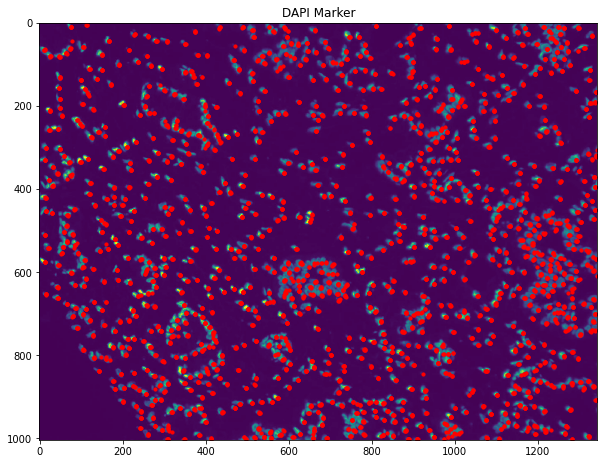

Centroids were Computed Based Off the Membrane and DAPI Nuclear Markers


In [59]:
plt.figure(figsize = (10,8))
plt.imshow(r_nucl)

plt.scatter(a[:,10], a[:,11], color = 'red', s = 10)
plt.title("DAPI Marker")
plt.show()
print("Centroids were Computed Based Off the Membrane and DAPI Nuclear Markers")

## Visualization of Metric Computation (and Full Contour Map) *Finish


In [24]:
print("Enter a valid Marker Number for Computation Visualization:")
marknum = input()
marknum = int(marknum)

Enter a valid Marker Number for Computation Visualization:
1


In [25]:
l_region = labeled_markers[marknum-1]
orig_region = orig_mark_im[marknum-1]

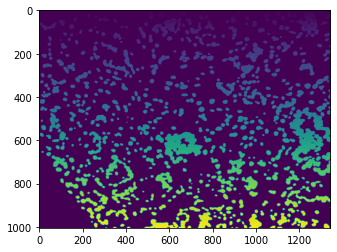

In [26]:
rang = list(l_region.flat)
res = []
for i in rang:
    if i not in res:
        res.append(i)

res = list(np.sort(res)) 
res.pop(0)
plt.imshow(l_region)

#### Set Index:

In [27]:
print("Max Index:", (len(res)-1))

Max Index: 1056


In [30]:
#between 0 and max index
i = 100

Average Intensity: 21.602094240837697
Max Intensity: 103.0
Min Intensity: 3.0
X Centroid: 191.74869109947645
Y Centroid: 100.07329842931937


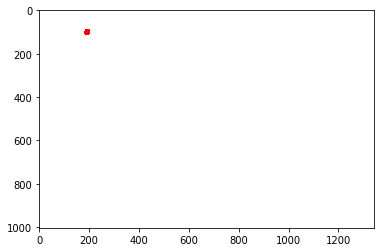

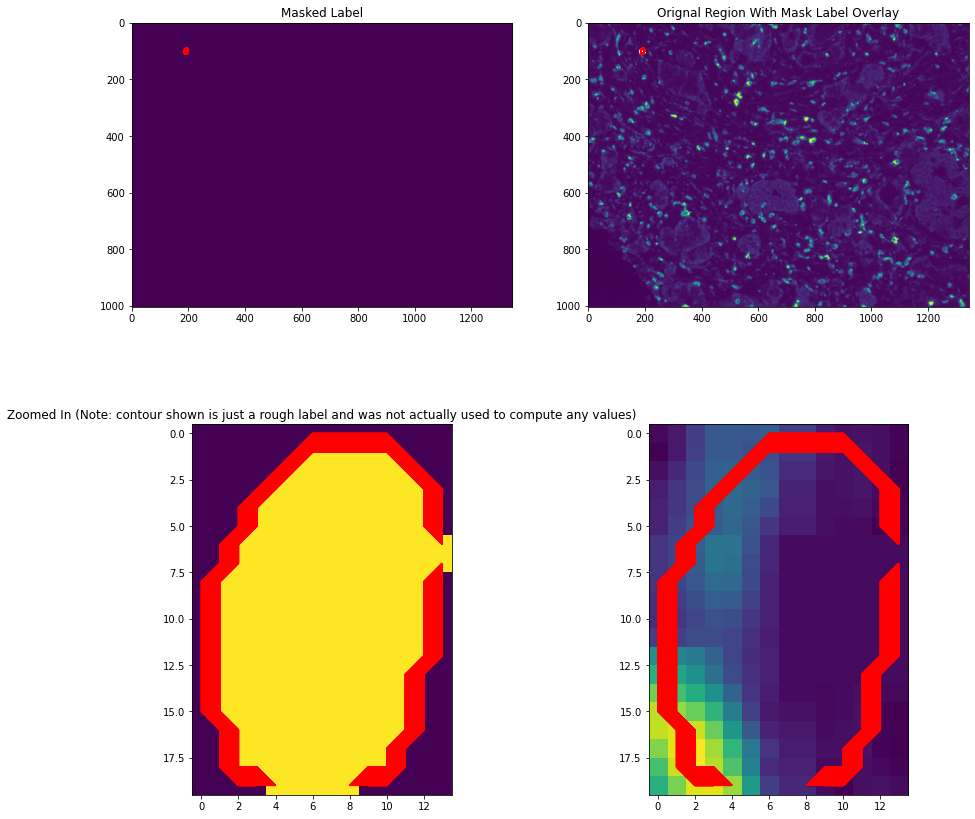

In [31]:
temp_highlight = l_region == res[i]
ctr_region = plt.contour(temp_highlight, res[i], colors = 'red')
plt.gca().invert_yaxis()
vert_ctr = ctr_region.collections[0].get_paths()[0]
v = vert_ctr.vertices
v = np.transpose(v)

#centroid = [sum(v[0][:]) // v.shape[1], sum(v[1][:]) // v.shape[1]]
ii = np.where(temp_highlight == True)
length_coord = len(ii[0])
intensities = np.zeros(length_coord)
x = np.zeros(length_coord)
y = np.zeros(length_coord)

for j in range(length_coord):
    y_temp = ii[0][j]
    x_temp = ii[1][j]
    intensities[j] = orig_region[y_temp][x_temp]
    x[j] = x_temp
    y[j] = y_temp

#centroid    
X =  np.mean(x)
Y = np.mean(y)
print("Average Intensity:", np.mean(intensities))
print("Max Intensity:", max(intensities))
print("Min Intensity:", min(intensities))
print("X Centroid:", X)
print("Y Centroid:", Y)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

ax[0][0].imshow(temp_highlight)
ax[0][0].set_title("Masked Label")
ax[0][0].contour(temp_highlight, res[i], colors = 'red')
ax[0][1].imshow(orig_region) 
ax[0][1].set_title("Orignal Region With Mask Label Overlay")
ax[0][1].scatter(int(X), int(Y), color = 'white')
ax[0][0].contour(temp_highlight, res[i], colors = 'red')
ax[0][1].contour(temp_highlight, res[i], colors = 'red')

width = max(v[0][:])-min(v[0][:])
height = max(v[1][:])-min(v[1][:])
#x = centroid[0]
#y = centroid[1]

temp_image = Image.fromarray(orig_region)
temp_image2 = Image.fromarray(l_region)
left = (X - (width//2))
right = (X + (width//2))
bottom = (Y + (height//2))
top = (Y - (height//2))

crop_temp_image = temp_image.crop((left, top, right, bottom))
crop_temp_image2 = temp_image2.crop((left, top, right, bottom))
new_temp_image = np.array(crop_temp_image)
new_temp_image2 = np.array(crop_temp_image2)

ax[1][0].imshow(new_temp_image2)
ax[1][0].contour(new_temp_image2, 500, colors = 'red')
ax[1][0].set_title("Zoomed In (Note: contour shown is just a rough label and was not actually used to compute any values)")
ax[1][1].imshow(new_temp_image)
ax[1][1].contour(new_temp_image2, 500, colors = 'red')

